## Data Pre-processing

#### Import relevant modules

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#### Load the dataset

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [5]:
df.drop(labels = ['Date','Location','Evaporation','Sunshine','Cloud3pm','Cloud9am','RISK_MM'],axis = 1,inplace = True)

In [6]:
# Replace Nilai Yes / No
df['RainToday'].replace({'No':0,'Yes':1},inplace = True) 
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace = True)

In [7]:
#Remove missing values
df.dropna(inplace = True) 

In [8]:
categorical = ['WindGustDir','WindDir9am','WindDir3pm']
df_final = pd.get_dummies(df,columns = categorical,drop_first=True)

In [9]:
df_final.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0


## Separating Your Training and Testing Datasets

In [10]:
X = df_final.drop(['RainTomorrow'],axis=1).values
y = df_final['RainTomorrow'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Transforming the Data

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Define the plotting function

In [13]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


## Artificial Neural Network

#### Define a deep neural net model

In [14]:
def create_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    
    # Define the first hidden layer with 6 nodes.
    model.add(tf.keras.layers.Dense(6, kernel_initializer = "uniform",activation = "relu", input_dim=58))
    # Define the second hidden layer with 1 nodes. sigmoid activation
    model.add(tf.keras.layers.Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])
    
#     model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
    
    return model

#### Define a training function

In [18]:
def train_model(model, features_arr, label_arr, epochs, 
                batch_size=None):
    history = model.fit(features_arr, label_arr, batch_size, epochs )
    
    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch
    
    # To track the progression of training, gather a snapshot
    # of the model's mean squared error at each epoch. 
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse

#### Call the functions to build and train a deep neural net

Train on 79047 samples
Epoch 1/25
79047/79047 [==============================] - 0s 5us/sample - loss: 0.2250 - mean_squared_error: 0.2250
Epoch 2/25
79047/79047 [==============================] - 0s 1us/sample - loss: 0.1515 - mean_squared_error: 0.1515
Epoch 3/25
79047/79047 [==============================] - 0s 1us/sample - loss: 0.1231 - mean_squared_error: 0.1231
Epoch 4/25
79047/79047 [==============================] - 0s 1us/sample - loss: 0.1162 - mean_squared_error: 0.1162
Epoch 5/25
79047/79047 [==============================] - 0s 1us/sample - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 6/25
79047/79047 [==============================] - 0s 1us/sample - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 7/25
79047/79047 [==============================] - 0s 1us/sample - loss: 0.1081 - mean_squared_error: 0.1081
Epoch 8/25
79047/79047 [==============================] - 0s 1us/sample - loss: 0.1073 - mean_squared_error: 0.1073
Epoch 9/25
79047/79047 [=========================

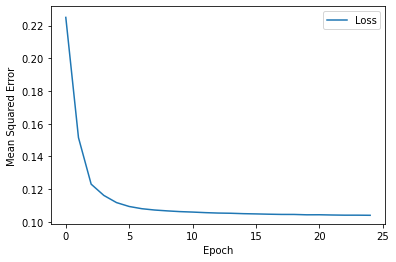


 Evaluate the new model against the test set:
33878/33878 [==============================] - 0s 2us/sample - loss: 0.1061 - mean_squared_error: 0.1061


[0.10611733912751303, 0.10611734]

In [29]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 25
batch_size = 5000

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model
epochs, mse = train_model(my_model, X_train, y_train, epochs, 
                          batch_size)
plot_the_loss_curve(epochs, mse)

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = X_test, y = y_test, batch_size=batch_size)

## Running Predictions on the Test Set

In [30]:
y_pred = my_model.predict(X_test)
y_train_pred = my_model.predict_classes(X_train)

In [31]:
print('Training Accuracy ---->',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy  ---->',accuracy_score(y_test,y_pred.round()))

Training Accuracy ----> 0.8551747694409655
Testing Accuracy  ----> 0.8514670287502214
